# View Some Augmented Test Samples

In [1]:
import os
from pathlib import Path
import sys
import tensorflow as tf
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage

base_path = os.path.abspath(os.getcwd())
os.chdir(Path(base_path).parent)
print(f'Current dir is now {os.getcwd()}')

sys.path.insert(0, "./")
from modules.settings import get_settings
from modules.audio_features import convert_wav_to_spectrogram_with_random_background_audio
settings = get_settings()

2024-10-02 20:44:16.472875: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-02 20:44:16.488227: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-02 20:44:16.492476: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-02 20:44:16.504914: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-02 20:44:17.249901: W tensorflow/compiler/tf2

Current dir is now /home/pal/wakeword/Wakeword-Training


In [2]:
wake_word_audio_files = tf.io.gfile.glob(settings.raw_wake_word_training_dir + "/**/*.wav")
negative_words_files = tf.io.gfile.glob(settings.raw_negative_words_training_dir + "/**/*.wav")
negative_audio_files = tf.io.gfile.glob(settings.raw_negative_audio_training_dir + "/**/*.wav")

In [3]:
wake_word_spectrograms = []
print(len(wake_word_audio_files))
for i in tqdm(range(16)):
    wake_word_spectrograms.append(convert_wav_to_spectrogram_with_random_background_audio(np.random.choice(wake_word_audio_files)))

negative_words_spectrograms = []
print(len(wake_word_audio_files))
for i in tqdm(range(16)):
    negative_words_spectrograms.append(convert_wav_to_spectrogram_with_random_background_audio(np.random.choice(negative_words_files)))

negative_audio_spectrograms = []
print(len(wake_word_audio_files))
for i in tqdm(range(16)):
    negative_audio_spectrograms.append(convert_wav_to_spectrogram_with_random_background_audio(np.random.choice(negative_audio_files)))

9616


  0%|          | 0/16 [00:00<?, ?it/s]2024-10-02 20:44:19.146614: I tensorflow_io/core/kernels/cpu_check.cc:128] Your CPU supports instructions that this TensorFlow IO binary was not compiled to use: SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA
2024-10-02 20:44:19.150696: W tensorflow_io/core/kernels/audio_video_mp3_kernels.cc:271] libmp3lame.so.0 or lame functions are not available
I0000 00:00:1727894659.496760  318716 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:08:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1727894659.519499  318716 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:08:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1727894659.519554  318716 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:08:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1727894659.522597  31

9616


100%|██████████| 16/16 [00:00<00:00, 33.24it/s]


9616


100%|██████████| 16/16 [00:00<00:00, 35.78it/s]


(199, 257)


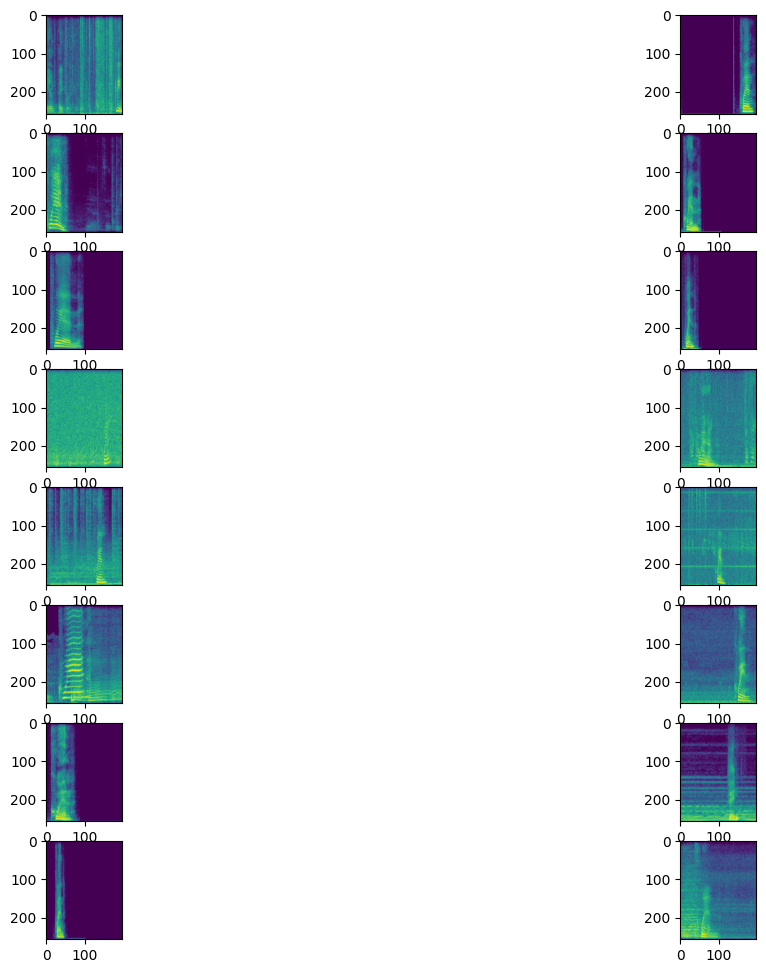

In [4]:
print(wake_word_spectrograms[0].shape)

fig, axes = plt.subplots(8, 2, figsize=(15, 12))
axes = axes.flatten()
for spectrogram, ax in zip(wake_word_spectrograms, axes):
    rotated_img = ndimage.rotate(spectrogram, 90)
    ax.imshow(rotated_img)
    
plt.show()

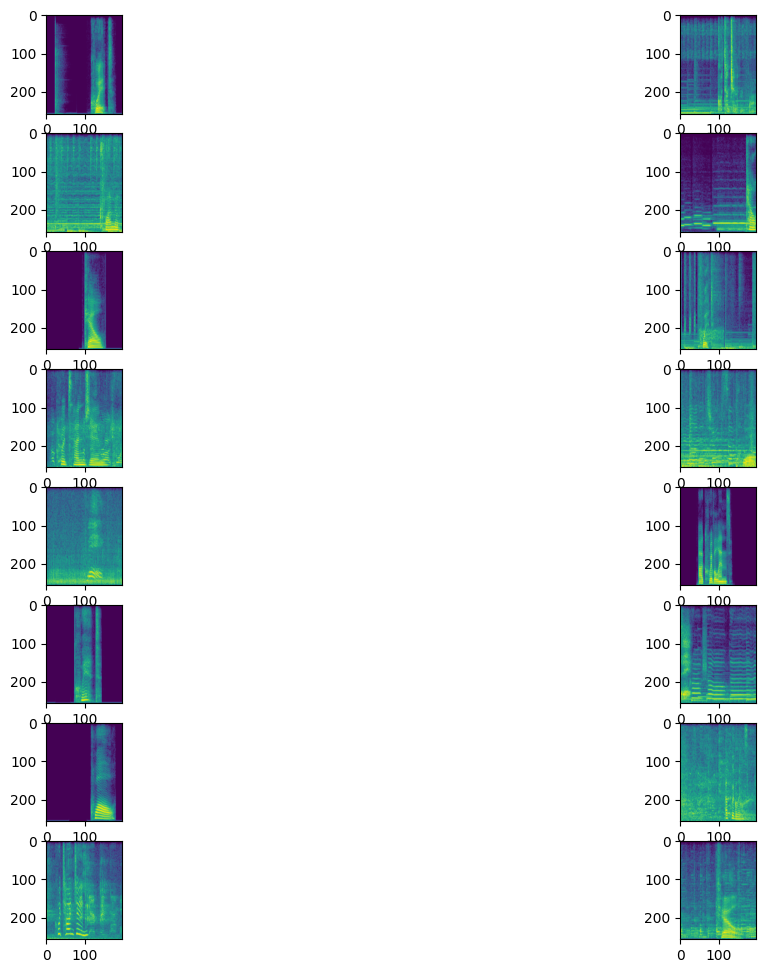

In [5]:
fig, axes = plt.subplots(8, 2, figsize=(15, 12))
axes = axes.flatten()
for spectrogram, ax in zip(negative_words_spectrograms, axes):
    rotated_img = ndimage.rotate(spectrogram, 90)
    ax.imshow(rotated_img)
    
plt.show()

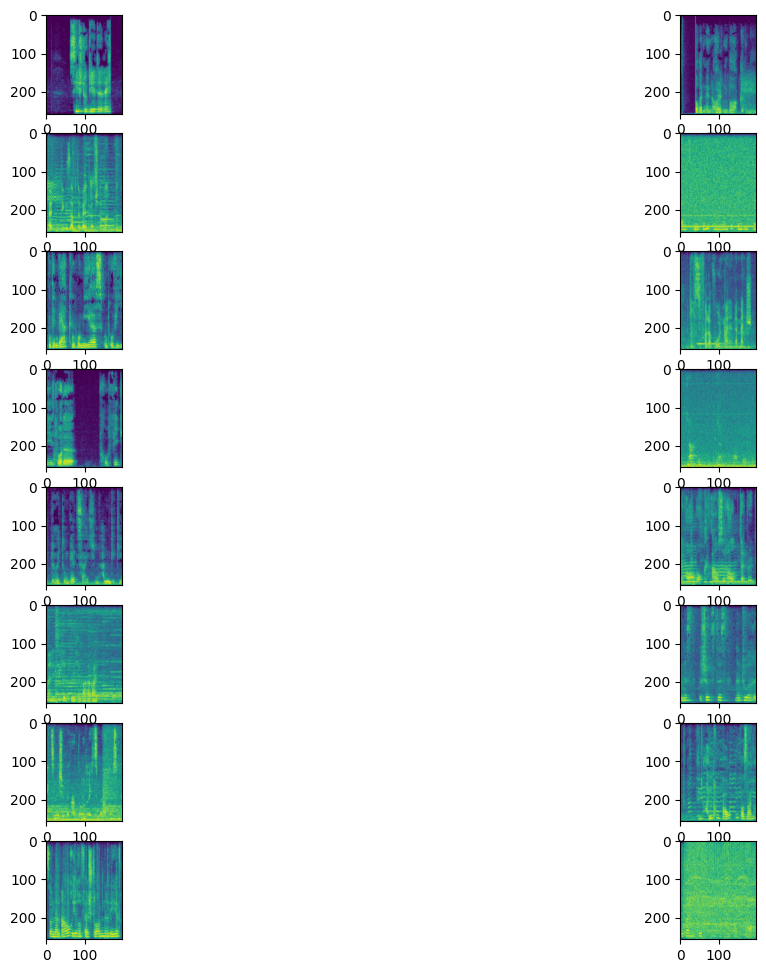

In [6]:
fig, axes = plt.subplots(8, 2, figsize=(15, 12))
axes = axes.flatten()
for spectrogram, ax in zip(negative_audio_spectrograms, axes):
    rotated_img = ndimage.rotate(spectrogram, 90)
    ax.imshow(rotated_img)
    
plt.show()